HELOO


In [3]:
import os
import tarfile
import requests
import warnings
from requests.packages.urllib3.exceptions import InsecureRequestWarning

warnings.filterwarnings("ignore", category=InsecureRequestWarning)

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    response = requests.get(housing_url, verify=False)
    with open(tgz_path, "wb") as f:
        f.write(response.content)
    with tarfile.open(tgz_path) as housing_tgz:
        housing_tgz.extractall(path=housing_path)

fetch_housing_data()



    

/var/folders/zw/65wc71mj61zfm9m5y58nl1rm0000gn/T/ipykernel_1309/2771193994.py:20: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  housing_tgz.extractall(path=housing_path)


In [5]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
print(housing.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [2]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
print(housing.head())


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [3]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
import pandas as pd
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()
print(housing.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

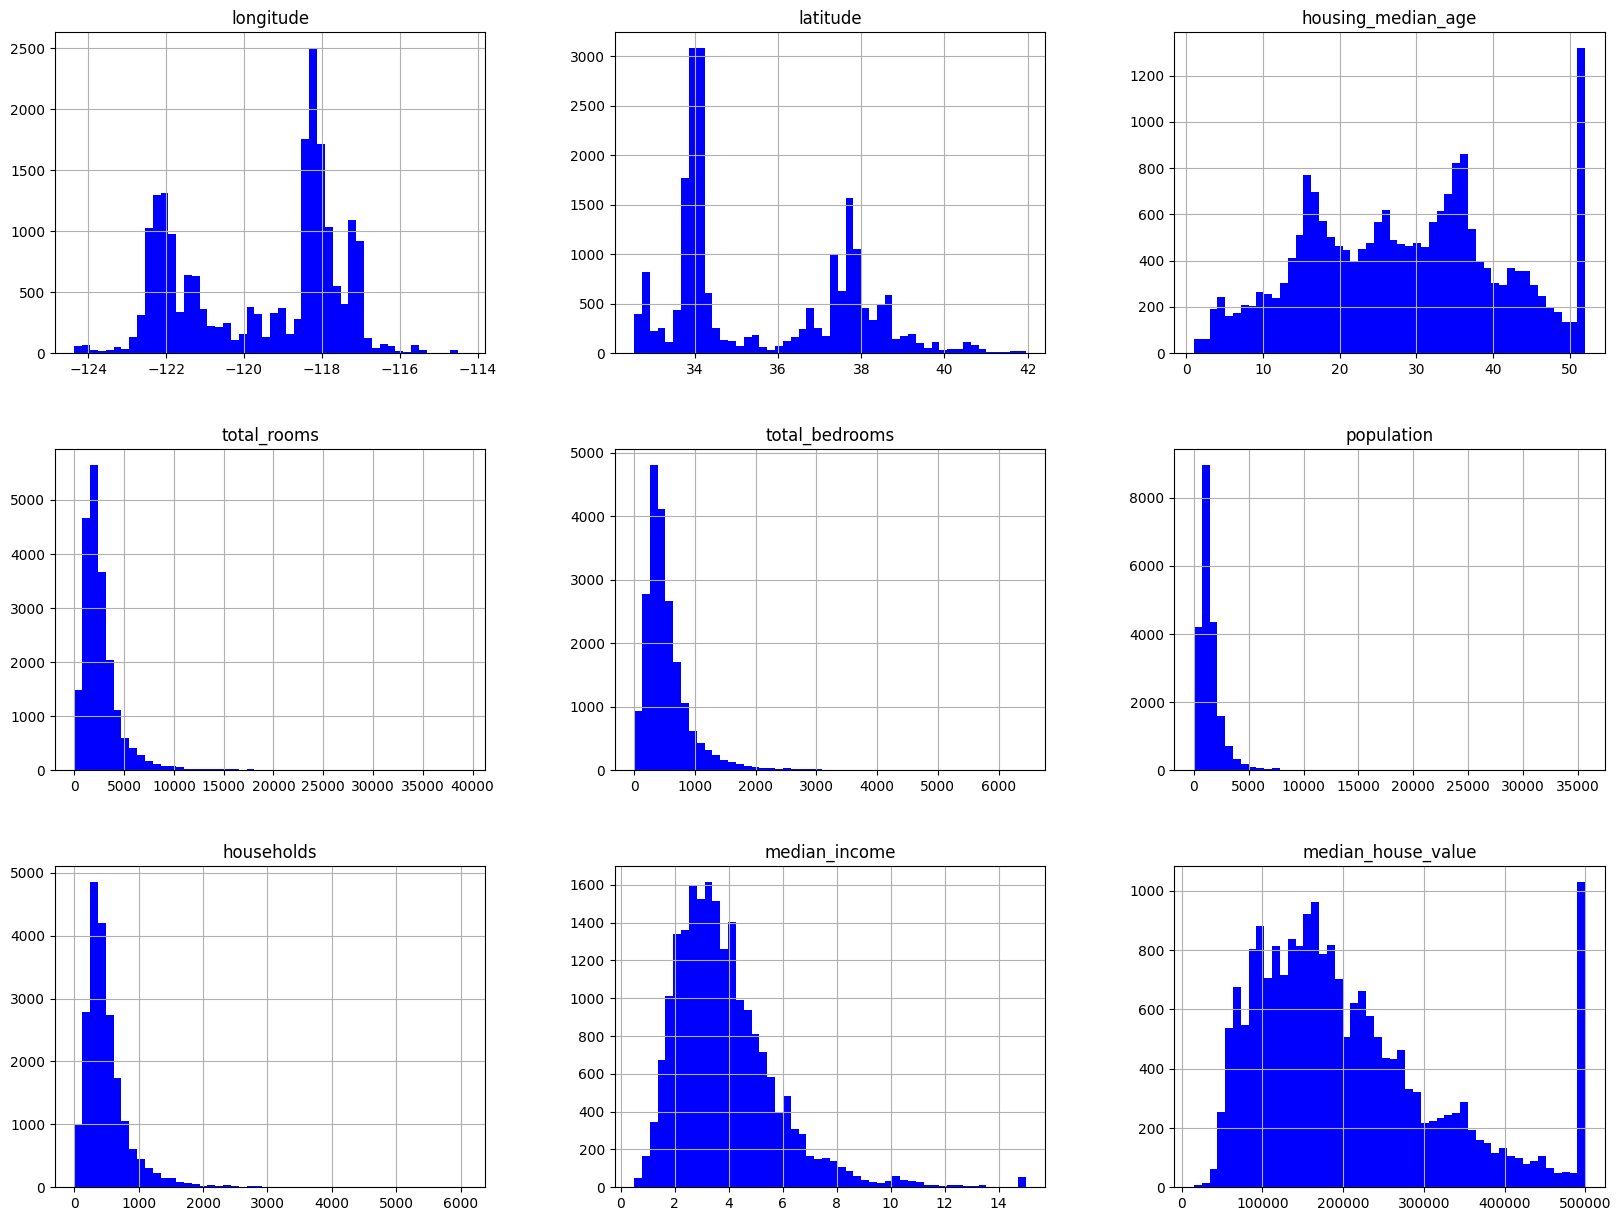

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_housing_data()

housing.hist(bins=50, figsize=(20,15),color="blue")
plt.show()


In [6]:
# ✅ Step 1: Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit

# ✅ Step 2: Load your dataset
# (Assuming 'housing' is your DataFrame)
# Example:
# housing = pd.read_csv("datasets/housing/housing.csv")

# ✅ Step 3: Create an income category column for stratified sampling
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

from sklearn.model_selection import StratifiedShuffleSplit

# Step 4: Initialize the split object
split = StratifiedShuffleSplit(
    n_splits=1,
    test_size=0.2,
    random_state=42
)

# Step 5: Perform the stratified split (use iloc)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

# Step 6: Remove 'income_cat' column after splitting
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Step 7: Verify
print("Training set shape:", strat_train_set.shape)
print("Test set shape:", strat_test_set.shape)

# Step 8: Create a copy for further use
housing = strat_train_set.copy()




Training set shape: (16512, 10)
Test set shape: (4128, 10)


/var/folders/zw/65wc71mj61zfm9m5y58nl1rm0000gn/T/ipykernel_2592/4278744527.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
/var/folders/zw/65wc71mj61zfm9m5y58nl1rm0000gn/T/ipykernel_2592/4278744527.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("inco

<Axes: xlabel='longitude', ylabel='latitude'>

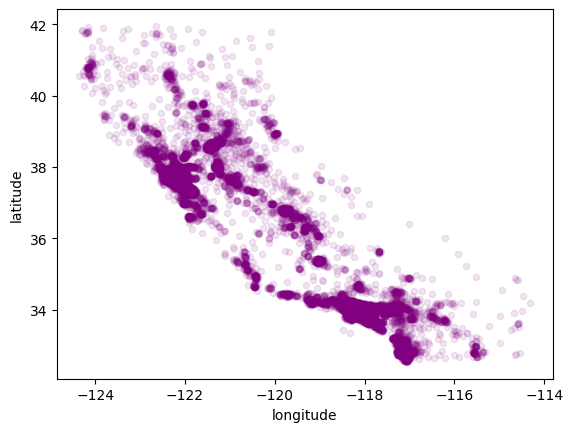

In [7]:
housing.plot(kind="scatter", x="longitude", y="latitude", color='purple',alpha=0.1)

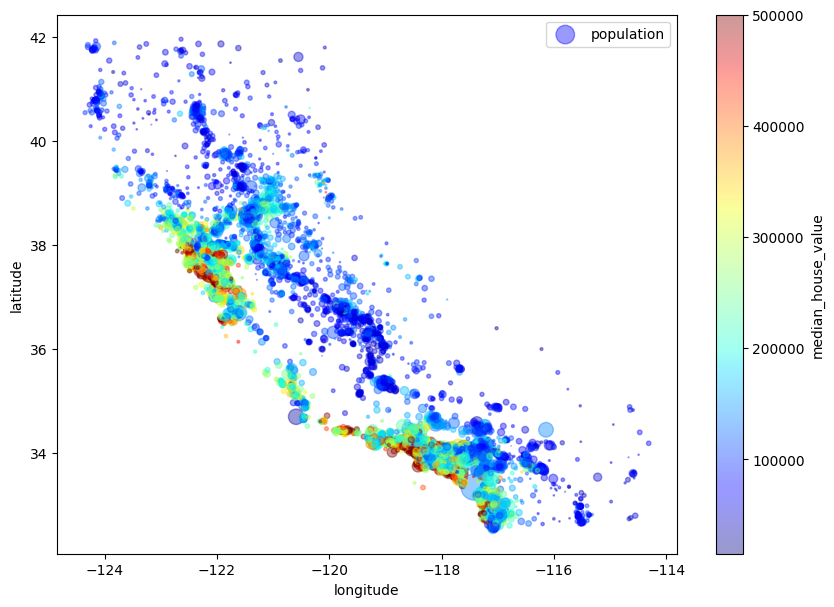

In [8]:
import matplotlib.pyplot as plt
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
s=housing["population"]/100, label="population", figsize=(10,7),
c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [9]:

corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)




median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [10]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)


median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [13]:
housing = strat_train_set.copy()
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()


In [15]:
# ✅ Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer  # newer version of Imputer

# ✅ Step 2: Separate numerical data (remove text columns)
housing_num = housing.drop("ocean_proximity", axis=1)

# ✅ Step 3: Create an imputer and choose the strategy (median)
imputer = SimpleImputer(strategy="median")

# ✅ Step 4: Fit the imputer on the training data
imputer.fit(housing_num)

# ✅ Step 5: Check computed medians (optional)
print("Median values for each attribute:")
print(imputer.statistics_)

# ✅ Step 6: Transform the data — replace missing values with medians
X = imputer.transform(housing_num)

# ✅ Step 7: Convert the result back into a DataFrame
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

# ✅ Step 8: Verify if any missing values remain
print("\nRemaining missing values per column:")
print(housing_tr.isna().sum())


Median values for each attribute:
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]

Remaining missing values per column:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Suppose your categorical column is 'ocean_proximity'
housing_cat = housing[["ocean_proximity"]]

# Create encoder
cat_encoder = OneHotEncoder()

# Fit and transform
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

# To see it as an array (optional)
housing_cat_1hot.toarray()


In [16]:
cat_encoder = OneHotEncoder(sparse_output=False)
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot



NameError: name 'OneHotEncoder' is not defined

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


In [21]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# numerical pipeline
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

# categorical pipeline
cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('cat_encoder', OneHotEncoder(sparse_output=False))
])

# combine both
full_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline)
])

housing_prepared = full_pipeline.fit_transform(housing)




NameError: name 'DataFrameSelector' is not defined

In [4]:
# ✅ Step 1: Import all required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# ✅ Step 2: Load the dataset
housing = pd.read_csv("datasets/housing/housing.csv")

# ✅ Step 3: Create income category for stratified sampling
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)

# ✅ Step 4: Stratified train-test split (fixed version)
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]

# ✅ Step 5: Remove income_cat column (no longer needed)
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# ✅ Step 6: Separate features and labels
housing_train = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# ✅ Step 7: Custom transformer to add combined attributes
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# ✅ Step 8: Identify numeric and categorical attributes
num_attribs = list(housing_train.drop("ocean_proximity", axis=1))
cat_attribs = ["ocean_proximity"]

# ✅ Step 9: Numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),       # handle missing values
    ('attribs_adder', CombinedAttributesAdder()),        # add new combined features
    ('scaler', StandardScaler()),                        # standardize features
])

# ✅ Step 10: Full pipeline (numerical + categorical)
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

# ✅ Step 11: Prepare the data
housing_prepared = full_pipeline.fit_transform(housing_train)

# ✅ Step 12: Check shape and sample data
print("✅ Data preprocessing successful!")
print("Shape of prepared data:", housing_prepared.shape)
print("Example of one transformed row:\n", housing_prepared[0])

# ✅ Step 13: Ready for model training
print("\nYour data is now ready for training!")


✅ Data preprocessing successful!
Shape of prepared data: (16512, 16)
Example of one transformed row:
 [-0.94135046  1.34743822  0.02756357  0.58477745  0.64037127  0.73260236
  0.55628602 -0.8936472   0.01739526  0.00622264 -0.12112176  0.
  1.          0.          0.          0.        ]

Your data is now ready for training!


/var/folders/zw/65wc71mj61zfm9m5y58nl1rm0000gn/T/ipykernel_1309/1378533233.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace=True)
/var/folders/zw/65wc71mj61zfm9m5y58nl1rm0000gn/T/ipykernel_1309/1378533233.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  set_.drop("inco

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [9]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print()
print("Labels:", list(some_labels))

Predictions: [405583.1848375  431505.91876453 377291.59965087 319278.55839926
 253227.67993798]

Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [10]:
>>> from sklearn.metrics import mean_squared_error
>>> housing_predictions = lin_reg.predict(housing_prepared)
>>> lin_mse = mean_squared_error(housing_labels, housing_predictions)
>>> lin_rmse = np.sqrt(lin_mse)
>>> lin_rmse


np.float64(68627.87390018745)

In [11]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [12]:
>>> housing_predictions = tree_reg.predict(housing_prepared)
>>> tree_mse = mean_squared_error(housing_labels, housing_predictions)
>>> tree_rmse = np.sqrt(tree_mse)
>>> tree_rmse

np.float64(0.0)

In [13]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [71773.90576969 70273.9000458  68443.30495661 72322.53505042
 69366.22436761 76551.90863156 71824.9365946  72596.23500935
 69045.34509657 69138.85773994]
Mean: 71133.71532621476
Standard deviation: 2307.359249613829


In [14]:
import numpy as np
from sklearn.model_selection import cross_val_score
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighfbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor  # small NN


def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

def train_evaluate_save(model, model_name, X, y):
    print(f"\n🚀 Training model: {model_name}")

    # 10-fold cross validation
    scores = cross_val_score(model, X, y,
                             scoring="neg_mean_squared_error", cv=10)
    rmse_scores = np.sqrt(-scores)

    # Show results
    display_scores(rmse_scores)

    # Fit on full training set
    model.fit(X, y)

    # Save model + scores together
    model_info = {
        "model": model,
        "cv_scores": rmse_scores,
        "mean_rmse": rmse_scores.mean(),
        "std_rmse": rmse_scores.std(),
        "params": model.get_params()
    }

    filename = f"{model_name}.pkl"
    joblib.dump(model_info, filename)

    print(f"💾 Saved as: {filename}")
    return model_info

models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "SVM_RBF": SVR(kernel='rbf'),
    "SVM_Linear": SVR(kernel='linear'),
    "KNN": KNeighborsRegressor(),
    "NeuralNetwork": MLPRegressor(hidden_layer_sizes=(50, 50),
                                  max_iter=500)
}

all_results = {}

for name, model in models.items():
    result = train_evaluate_save(model, name, housing_prepared, housing_labels)
    all_results[name] = result


ModuleNotFoundError: No module named 'sklearn.neighfbors'

In [15]:

import joblib
loaded_model = joblib.load("RandomForest.pkl")
loaded_model




{'model': RandomForestRegressor(),
 'cv_scores': array([51582.14288449, 49298.68710074, 46610.5585558 , 52122.22657483,
        47692.64793834, 51973.53600441, 52427.38524777, 49844.54427248,
        48496.87714429, 53937.38727271]),
 'mean_rmse': np.float64(50398.59929958617),
 'std_rmse': np.float64(2242.6734311533487),
 'params': {'bootstrap': True,
  'ccp_alpha': 0.0,
  'criterion': 'squared_error',
  'max_depth': None,
  'max_features': 1.0,
  'max_leaf_nodes': None,
  'max_samples': None,
  'min_impurity_decrease': 0.0,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'min_weight_fraction_leaf': 0.0,
  'monotonic_cst': None,
  'n_estimators': 100,
  'n_jobs': None,
  'oob_score': False,
  'random_state': None,
  'verbose': 0,
  'warm_start': False}}

In [18]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
{'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_mean_squared_error')
grid_search.fit(housing_prepared, housing_labels)

,estimator,RandomForestRegressor()
,param_grid,"[{'max_features': [2, 4, ...], 'n_estimators': [3, 10, ...]}, {'bootstrap': [False], 'max_features': [2, 3, ...], 'n_estimators': [3, 10]}]"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,30


In [19]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [30, 60, 100], 'max_features': [4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [30, 60], 'max_features': [4, 6]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(
    forest_reg,
    param_grid,
    cv=5,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    return_train_score=True
)

grid_search.fit(housing_prepared, housing_labels)
print("Best params:", grid_search.best_params_)
best_model = grid_search.best_estimator_

joblib.dump(best_model, "BestRandomForest.pkl")
print("Saved BestRandomForest.pkl")


Best params: {'bootstrap': False, 'max_features': 6, 'n_estimators': 60}
Saved BestRandomForest.pkl


In [20]:
# STEP 1: Prepare test set
test_set = strat_test_set.copy()
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

# STEP 2: Transform test set
X_test_prepared = full_pipeline.transform(X_test)

# STEP 3: Load best model
import joblib
best_model = joblib.load("BestRandomForest.pkl")

# STEP 4: Predict
final_predictions = best_model.predict(X_test_prepared)

# STEP 5: Evaluate
from sklearn.metrics import mean_squared_error
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

print("Final RMSE on test set:", final_rmse)


Final RMSE on test set: 46578.610457603594


In [21]:
from sklearn.model_selection import cross_val_score
import numpy as np

best_model = grid_search.best_estimator_  # or loaded model

# Cross-validate again to compute CV RMSE
cv_scores = cross_val_score(
    best_model,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

cv_rmse_scores = np.sqrt(-cv_scores)

print("\n📌 Cross-Validation RMSE Scores:", cv_rmse_scores))
print("📌 Mean CV RMSE:", cv_rmse_scores.mean())
print("📌 CV RMSE Std Dev:", cv_rmse_scores.std())



📌 Cross-Validation RMSE Scores: [50118.65615814 47352.13124889 45590.14651893 49732.56164167
 47190.41027666 49004.53817456 50931.21839275 47794.86042648
 47401.30127337 52309.38334554]
📌 Mean CV RMSE: 48742.52074569861
📌 CV RMSE Std Dev: 1934.7380147856218
